In [ ]:
# import

In [ ]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.4f' % x)
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from kneed import KneeLocator

In [3]:
# upload dataset

In [5]:
df_ =pd.read_csv("datasets/flo_data_20k.csv")
df = df_.copy()

In [6]:
# create omnichannel and omnicahannel_value

In [7]:
df["omnichannel"] = df["order_num_total_ever_online"] + df["order_num_total_ever_offline"]
df["omnichannel_value"] = df["customer_value_total_ever_offline"] + df["customer_value_total_ever_online"]

In [9]:
df.head()

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12,omnichannel,omnichannel_value
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4.0000,1.0000,139.9900,799.3800,[KADIN],5.0000,939.3700
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-02-08,2021-02-16,2021-02-16,2020-01-10,19.0000,2.0000,159.9700,1853.5800,"[ERKEK, COCUK, KADIN, AKTIFSPOR]",21.0000,2013.5500
2,69b69676-1a40-11ea-941b-000d3a38a36f,Android App,Android App,2019-11-27,2020-11-27,2020-11-27,2019-12-01,3.0000,2.0000,189.9700,395.3500,"[ERKEK, KADIN]",5.0000,585.3200
3,1854e56c-491f-11eb-806e-000d3a38a36f,Android App,Android App,2021-01-06,2021-01-17,2021-01-17,2021-01-06,1.0000,1.0000,39.9900,81.9800,"[AKTIFCOCUK, COCUK]",2.0000,121.9700
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,Desktop,Desktop,2019-08-03,2021-03-07,2021-03-07,2019-08-03,1.0000,1.0000,49.9900,159.9900,[AKTIFSPOR],2.0000,209.9800


In [10]:
# convert variable which contain 'date' to datetime

In [11]:
for col in [col for col in df.columns if 'date' in col]:
    df[col] = df[col].apply(pd.to_datetime)

In [12]:
# frequency

In [13]:
df_num_order = df.groupby("master_id").agg({"omnichannel" :"sum"})

In [14]:
df_num_order.head()

,omnichannel
master_id,
00016786-2f5a-11ea-bb80-000d3a38a36f,5.0000
00034aaa-a838-11e9-a2fc-000d3a38a36f,3.0000
000be838-85df-11ea-a90b-000d3a38a36f,4.0000
000c1fe2-a8b7-11ea-8479-000d3a38a36f,7.0000
000f5e3e-9dde-11ea-80cd-000d3a38a36f,7.0000


In [15]:
# Number of customers by number of orders

In [16]:
df_new_num_order = df_num_order.value_counts()
df_new_num_order = df_new_num_order.reset_index()
df_new_num_order.columns = ['order', 'count']

In [17]:
df_new_num_order.head()

,order,count
0,2.0000,4717
1,3.0000,4377
2,4.0000,3127
3,5.0000,2145
4,6.0000,1515


In [18]:
# calculate threshold_1 with kneedle/elbow

In [22]:
kneedle = KneeLocator(df_new_num_order['order'], df_new_num_order['count'], S=1, curve='convex', direction='decreasing')
churn_threshold = kneedle.elbow

In [19]:
# visualization

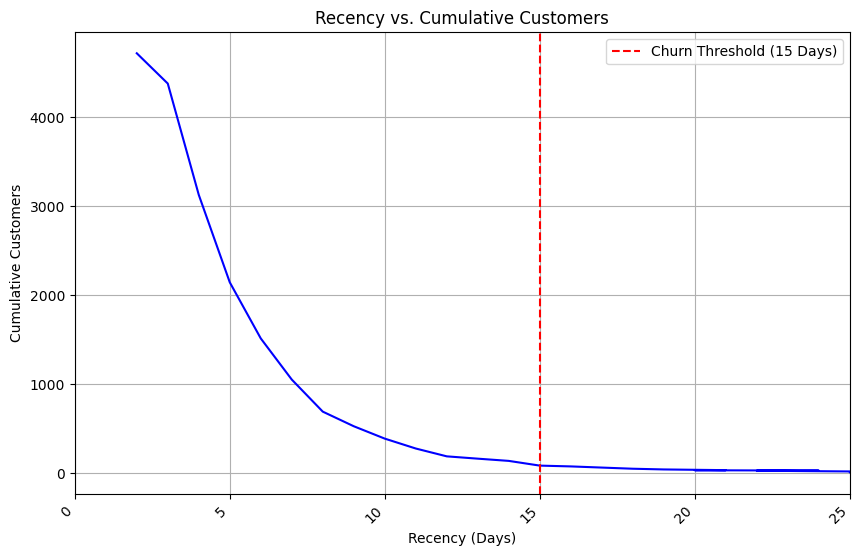

In [21]:
plt.figure(figsize=(10, 6))
plt.plot(df_new_num_order['order'], df_new_num_order['count'], color='b')
plt.xlabel('Recency (Days)')
plt.ylabel('Cumulative Customers')
plt.title('Recency vs. Cumulative Customers')
plt.xlim(0, 25)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.grid(True)
plt.axvline(x=churn_threshold, color='r', linestyle='--', label=f'Churn Threshold ({churn_threshold} Days)')
plt.legend()
plt.show(block=True)

In [ ]:
# The threshold value returned as 15,
# but ıf we get 15 we will lose many observations so we can set it 10.